# Building an Intelligent Fraud Detection System

For this project, we have used CRISP-DM framework in its data science process

## Project Overview
---
According to INTERPOL (2024), fraud trends vary by region, with West and Southern Africa experiencing increased romance baiting scams, while Asia faces telecommunication fraud where criminals impersonate law enforcement or bank officials. Commercial banks and health insurers are the most affected financial institutions, with identity fraud accounting for 45% of reported cases in 2023 and projected to reach 50% by year-end (Retail Banker International, 2024). The growing use of technology has enabled sophisticated fraud schemes at lower costs, with scam-related frauds rising by 56% in 2024, surpassing digital payment fraud (PYMNTS, 2024). Scams now constitute 23% of fraudulent transactions, with relationship and product scams driving financial losses. In Kenya, financial fraud is escalating, exposing vulnerabilities in the banking sector (Kenyan Wall Street, 2024). A major case involved Kiwipay Kenya Limited, where Ksh 2.3 billion ($19.48 million) was frozen due to suspected debit card fraud. The Central Bank of Kenya (CBK, 2025) attributes the surge in fraud to increased ICT adoption, low financial security awareness, and emerging cyber threats. Mobile and internet banking channels remain highly targeted, emphasizing the need for stronger security protocols and public education to combat digital financial fraud, (CBK, 2025).

## 1. Business Understanding


Kenya has experienced a massive shift to digital banking and mobile transactions, with platforms like M-Pesa, PesaLink, and internet banking becoming dominant. However, this digitization has also led to an increase in financial fraud cases, such as:

- ATM and Card Fraud: Criminals use card skimming devices to steal customer information.

- SIM Swap Fraud: Fraudsters gain control of a victim’s SIM card to access mobile banking accounts.

- Social Engineering Attacks: Scammers impersonate banks to trick customers into revealing sensitive information.

- Account Takeovers: Unauthorized individuals gain access to banking credentials and conduct fraudulent transactions.

In Kenya, several fraud cases have made headlines, including:

- KCB Bank SIM Swap Scam (2021) – Customers lost millions after fraudsters illegally swapped SIM cards to gain access to their mobile banking.

- Equity Bank Card Cloning (2022) – A group of criminals was arrested for skimming debit card details from unsuspecting users.

- M-Pesa Fraud Rings (2023) – Multiple fraud cases involved con artists deceiving individuals into sending money via M-Pesa through fake job offers and lottery scams.

- To combat these threats, banks need an intelligent, adaptive fraud detection system that can identify fraudulent transactions in real time while minimizing false alarms.

### i. Business Problem
Fraudulent banking transactions in Kenya have led to substantial financial losses and a decline in customer trust. Traditional rule-based fraud detection systems are insufficient in detecting sophisticated fraud schemes, especially as fraudsters continually evolve their tactics. There is a need for a machine learning-powered fraud detection system that can:

- Analyze past transaction data to learn fraud patterns

- Detect anomalies and flag suspicious transactions

- Adapt to new and emerging fraud techniques

- Operate in real time to prevent fraudulent transactions before they occurres. 

### ii. Business Objectives
The objective of this project is to develop a model to:
* Analyse bank transaction patterns with a view to detect fraud

* Come up with a predictive models that can accurately classify transactions as fraudulent or legitimate

* Study how demographics including age and gender impact fraud risks.

* Identify peak fraud periods based on transactions date and transactions time.

### iii. Target Audience

This project is designed for:

- Banks and Financial Institutions classified as Tier one banks in Kenya, seeking to enhance their fraud prevention mechanisms.

- Mobile Money Operators like Safaricom (M-Pesa), Airtel Money, and Telkom T-Kash looking to secure transactions from mobile fraudsters.

- Regulatory Bodies and Government agencies, including the Central Bank of Kenya (CBK) and Communications Authority of Kenya, ensuring compliance with digital fraud policies.

- Individual bank customers and corporate clients who require a secure and reliable banking system free from fraudulent activities.

## 2. Data Understanding

### i. Data Source and Description

The data was sourced from https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection 

The dataset used for model building contained 200,000 observations of 24 columns.

Here are the information of the columns:

* Customer_ID: A particular identifier for every customer within the bank's system.

* Customer_Name: The name of the customer making the transaction.

* Gender: The gender of the customer.

* Age: The age of the customer at the time of the transaction.

* State: The state in which the customer resides.

* City: The metropolis where the customer is living.

* Bank_Branch: The specific financial institution branch where the customer holds their account.

* Account_Type: The kind of account held by the customer.

* Transaction_ID: A particular identifier for each transaction.

* Transaction_Date: The date on which the transaction took place.

* Transaction_Time: The specific time the transaction was initiated.

* Transaction_Amount: The financial value of the transaction.

* Merchant_ID: A particular identifier for the merchant who facilitated the transaction.

* Transaction_Type: The nature of the transaction.

* Merchant_Category: The class of the merchant.

* Account_Balance: The balance of the customer's account after each transaction.

* Transaction_Device: The tool utilized by the consumer to perform the transaction.

* Transaction_Location: The geographical vicinity of the transaction.

* Device_Type: The kind of device used for the transaction.


##

### ii. Metrics of Success

- Area Under the Precision-Recall Curve (AUPRC) - Area Under the Precision-Recall Curve (AUPRC) metric is a more reliable measurement for the classification of highly imbalanced data as compared to the Area Under the Receiver Operating Characteristic Curve (AUC) metric,  (Leevy, Khoshgoftaar, & Hancock, 2022).

- Accuracy - Accuracy is the fraction of correct predictions among all predictions or how often a prediction is correct (Sathyanarayanan & Tantri, 2024). 


            Accuracy = (Number of correctly classified instances) / (Total number of instances)

            Accuracy = (True Positive + Truen Negative) / (True Positive + False Positive + True Negative + False Negative)

- Precision - Precision is the fraction of the correctly predicted positive results (Sathyanarayanan & Tantri, 2024).


            Precision = True Positive / (True Positive + False Positive)

- Recall - This measures the proportion of actual positives predicted correctly, or how accurately the model predicts positive cases (Sathyanarayanan & Tantri, 2024). 

            Recall = True Positive / (TP + FN).


### iii. Limitation

- The dataset class is imbalanced with fraudulent transactions making up a small prortion of the dataset, which may complicate the prediction of our model

### iv. Assumption

- Given the global fraud trends are also reported in the Kenyan banking environment coupled with rapid digital banking adoption, the Bank Transaction Fraud Detection data sourced from Kaggle is assumed to represent transactions patterns similar to Kenyan data on bank frauds. Furthermore, the similarity of frauds reported in Asia as per Interpol (2024) makes the dataset chosen more suitable for the Kenyan environment.

### 1.0 Importing Relevant Libraries

In [384]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import os
import zipfile
import warnings
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,classification_report,roc_curve, RocCurveDisplay, recall_score,precision_score, auc, precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.exceptions import UndefinedMetricWarning
sns.set_style(style='whitegrid')
warnings.simplefilter(action='ignore', category=FutureWarning)



### 2. DATA UNDERSTANDING

#### 2.1 Data Description and Quality

We will unzip the dataset first and then load it into a pandas DataFrame which will facilitate easy manipulation and analysis.

In [164]:
# Path to our zip file
zip_file_path = 'data/archive.zip'
extracted_files_path = 'data'

# Make sure the output directory exists
os.makedirs(extracted_files_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_files_path)

print(f"Files extracted to {extracted_files_path}")


Files extracted to data


Load the CSV file extracted into a pandas dataframe and read the first few rows of the data

In [ ]:
# Reading the CSV file into dataframes
df= pd.read_csv('data/Bank_Transaction_Fraud_Detection.csv')

# Display the first five rows of the dataframe
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


Next, we took steps to thoroughly understand the dataset before proceeding with data cleaning and transformation. This involved examining the structure and content of the dataset to gain insights into its composition and key characteristics.

In [166]:
# Checking the shape of the dataframe
df.shape

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")


The dataset has 200000 rows and 24 columns


#### Checking information of the dataset

In [ ]:
# Extracting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [168]:
# Checking for Data Types
df.dtypes

Customer_ID                 object
Customer_Name               object
Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_ID              object
Transaction_Date            object
Transaction_Time            object
Transaction_Amount         float64
Merchant_ID                 object
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Currency        object
Customer_Contact            object
Transaction_Description     object
Customer_Email              object
dtype: object

* The dataset has 2 columns with Float data type, 2 column with integer data type and 20 columns with categorical data types
*  The Transaction_Date and Transaction_Time columns are indicated as object data type. For analysis and feature engineering processes, the data types for the two columns will be converted to Datetime format
  
Next we shall check if there are any null values on the dataset


In [169]:
# Checking for null values
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

The Fraud Transaction dataset has no missing values. Next we will check for duplicate rows

In [170]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
duplicates

0

The dataset has no duplicate rows. We shall now generate summary statistics on numerical columns that will help us get insights on the dataset distribution

In [ ]:
# Getting summary statistics 
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


* The mean age, transaction amount and account Balance is 44 years, 49,538 INR and 53,437 INR, respectively
* The standard deviation of the age, transaction amount and Account balance is 15 years, 28,551 INR and 27,399 INR, respectively
* The minimum age and maximum age is 18 and 70 years

In [172]:
# Checking for the column names
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

### 2.2 Exploratory Data Analysis (EDA)

After loading and understanding the dataset, we shall now analyze and visualize the dataset to understand the structure, patterns, and potential issues in the data.

#### 2.2.1 Univariate Analysis

We will start our EDA with Univariate analysis. First we shall check for the distribution of the class feature to understand if there is any class imbalance.


#### 2.2.1.1 Histplot Showing Distribution of Fraudulent Transactions

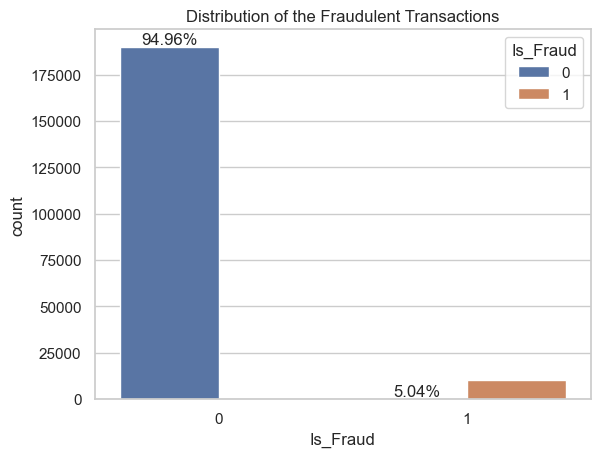

In [ ]:
# Counting the target variable 
fraud_counts = df["Is_Fraud"].value_counts(normalize=True) * 100

# Visualizing the distribution
ax = sns.countplot(x="Is_Fraud", data=df, hue="Is_Fraud")
plt.title("Distribution of the Fraudulent Transactions")

# Adding labels
for bar, percentage in zip(ax.patches, fraud_counts):
    height = bar.get_height()
    ax.annotate(f'{percentage:.2f}%',  
                (bar.get_x() + bar.get_width() / 2, height), 
                ha='center', va='bottom')  

# Showing the plot
plt.show()


  For the class 0 indicating (Non-fraud cases) which is 94.956% of the data while for class 1 (fraud cases) 5.044% of the data. This shows existence of class imbalance that we need to address during modelling. 

  Next we shall check the distribution of fraud cases by the type of Transaction



#### 2.2.1.2 Distribution of Fraud Cases by Transaction Type

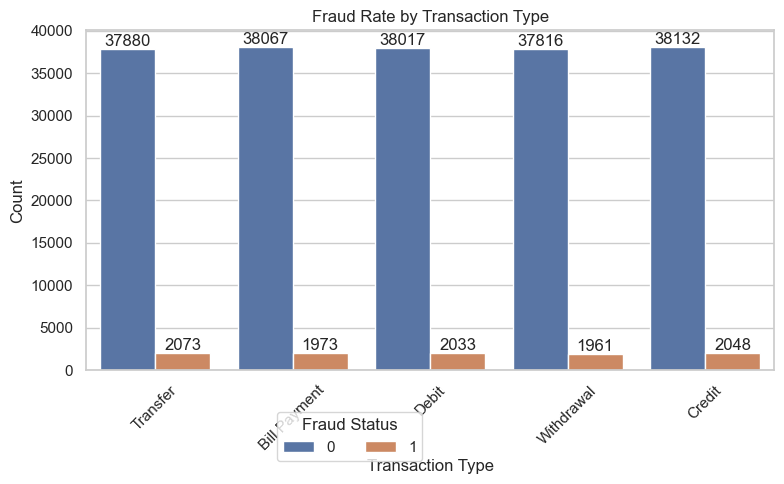

The transaction type with the highest cases of fraud is: Transfer


In [ ]:
# Analyzing the transaction type based on Fraud cases
fraud_counts = df[df['Is_Fraud'] == 1]['Transaction_Type'].value_counts()
highest_fraud_type = fraud_counts.idxmax()

# Creating a visualization with labels
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Transaction_Type'], hue=df['Is_Fraud'])

# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  

# Repositioning the legend
plt.legend(title='Fraud Status', bbox_to_anchor=(0.5, -0.1), ncol=2)  

# Displaying the plot
plt.xticks(rotation=45)
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.tight_layout()  
plt.show()

# Printing the transaction type with the highest cases of fraud
print(f"The transaction type with the highest cases of fraud is: {highest_fraud_type}")

Next, we will analyze distribution of fraud cases by state.

#### 2.2.1.3 Analysis of Distribution of Fraud Cases by State

<Figure size 1200x800 with 0 Axes>

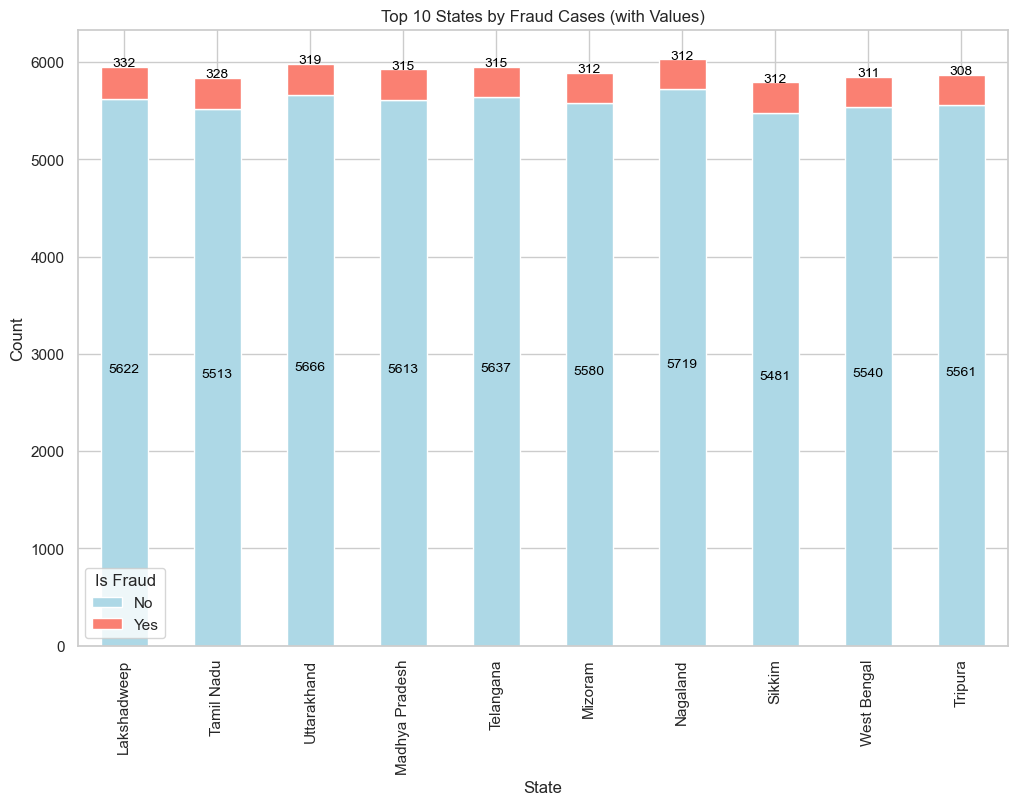

The state with the highest fraud cases is: Lakshadweep


In [ ]:
# Defining function to find the state with the highest fraud cases
def state_with_highest_fraud(df):
    fraud_counts = df[df['Is_Fraud'] == 1]['State'].value_counts()
    highest_fraud_state = fraud_counts.idxmax()
    return highest_fraud_state

# Defining function to plot the top ten states by fraud cases
def plot_top_ten_states_by_fraud_with_values(df):
    plt.figure(figsize=(12, 8))

    # Grouping data and summing fraud cases
    state_fraud_counts = df.groupby(['State', 'Is_Fraud']).size().unstack()
    state_fraud_counts[1] = state_fraud_counts[1].fillna(0)  
    state_fraud_counts[0] = state_fraud_counts[0].fillna(0)  
    state_fraud_counts['Total'] = state_fraud_counts.sum(axis=1)

    # Sorting by fraud cases and selecting top 10 states
    top_ten_fraud_counts = state_fraud_counts.nlargest(10, 1)

    # Dropping unnecessary columns for plotting
    top_ten_for_plot = top_ten_fraud_counts.drop(columns=['Total'])

    # Plotting top 10 states
    ax = top_ten_for_plot.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(12, 8))

    # Adding actual values to the top of each bar
    for i, state in enumerate(top_ten_fraud_counts.index):
        fraud_value = int(top_ten_fraud_counts.loc[state, 1])
        non_fraud_value = int(top_ten_fraud_counts.loc[state, 0])

        # Adding fraud value
        ax.text(i, fraud_value + non_fraud_value + 1, str(fraud_value), ha='center', fontsize=10, color='black')

        # Adding non-fraud value
        ax.text(i, non_fraud_value / 2, str(non_fraud_value), ha='center', fontsize=10, color='black')

    # Plotting details
    plt.title('Top 10 States by Fraud Cases (with Values)')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Is Fraud', labels=['No', 'Yes'])
    plt.show()

# Finding the state with the highest fraud cases
highest_fraud_state = state_with_highest_fraud(df)

# Plotting the results
plot_top_ten_states_by_fraud_with_values(df)

print(f"The state with the highest fraud cases is: {highest_fraud_state}")

#### 2.2.1.4 Analysis of Fraud Cases by Gender

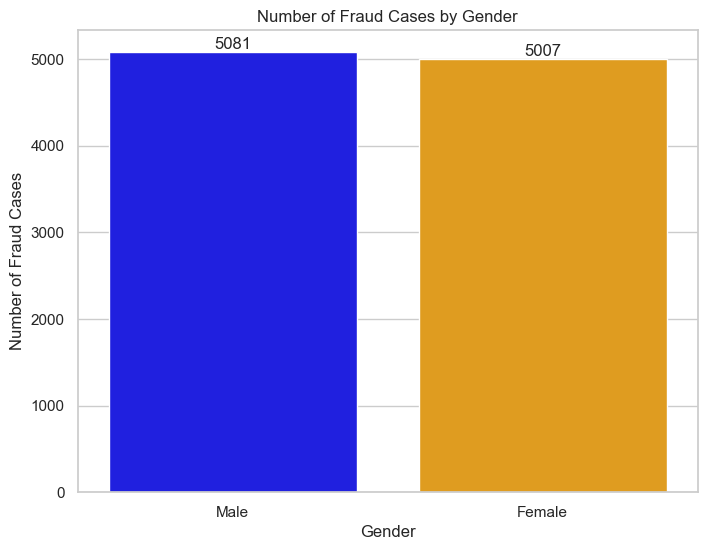

In [ ]:
# Number of fraud cases for each gender
gender_fraud = df[df["Is_Fraud"] == 1]['Gender'].value_counts()

# Visualizing the gender distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette=["blue", "orange"])

# Adding labels on each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')  

# Titles
plt.title('Number of Fraud Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraud Cases')
plt.show()


* The distribution points to a slightly higher number of reported fraud cases affecting males as compared to females.

#### 2.2.1.5 Distribution of Fraud and Non_Fraud Cases by the Transaction Device


Here is the sorted data by Transaction Device and Fraud Status:
Is_Fraud                          0     1
Transaction_Device                       
Self-service Banking Machine  20650  1057
ATM                           20167  1033
ATM Booth Kiosk               20067  1082
Debit/Credit Card              7818   455
Smart Card                     7722   411
Wearable Device                7729   399
Virtual Card                   7620   439
Tablet                         7652   407
Desktop/Laptop                 7646   411
Voice Assistant                7627   412
POS Mobile Device              7600   406
Banking Chatbot                7617   378
Web Browser                    7573   408
Biometric Scanner              7523   429
QR Code Scanner                7527   411
Mobile Device                  7482   397
Payment Gateway Device         7452   422
POS Mobile App                 7477   391
Bank Branch                    7480   375
POS Terminal                   7483   365


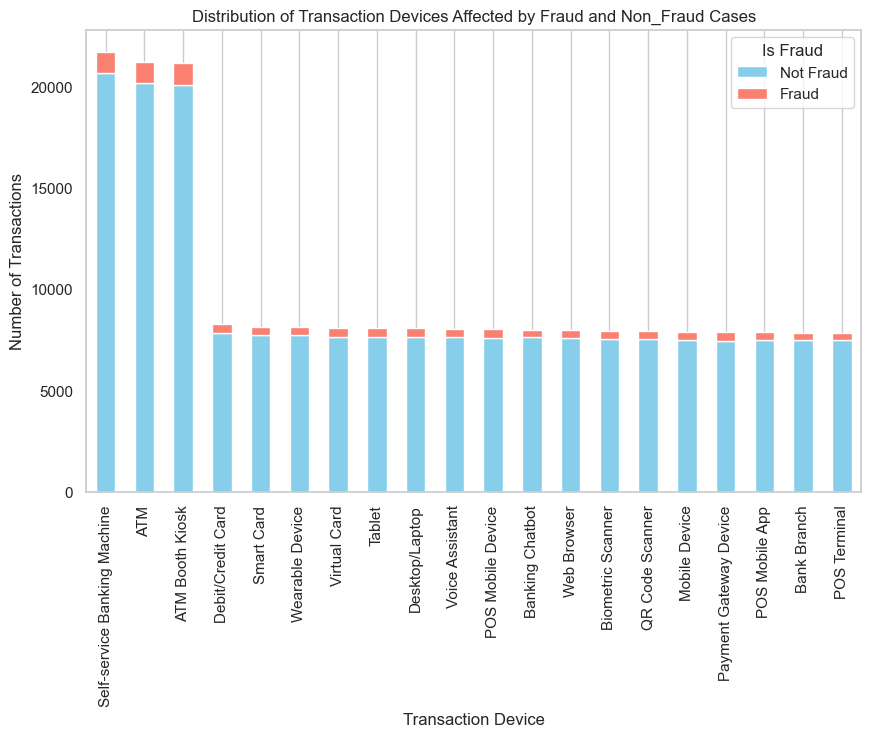


The transaction device with the highest fraud cases is: ATM Booth Kiosk

The transaction device with the lowest fraud cases is: POS Terminal


In [ ]:
# Grouping the transaction devices and fraud status
grouped_data = df.groupby(['Transaction_Device', 'Is_Fraud']).size().unstack(fill_value=0)

# Sorting the grouped data by the total number of transactions
grouped_data['Total'] = grouped_data.sum(axis=1) 
grouped_data = grouped_data.sort_values(by='Total', ascending=False)  
grouped_data = grouped_data.drop(columns=['Total']) 

# Printing the sorted data
print("\nHere is the sorted data by Transaction Device and Fraud Status:")
print(grouped_data)

# Finding the transaction device with the highest fraud cases
highest_fraud_device = grouped_data[1].idxmax()
lowest_fraud_device = grouped_data.iloc[:, -1].idxmin() 

# Plotting the sorted data
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Distribution of Transaction Devices Affected by Fraud and Non_Fraud Cases')
plt.xlabel('Transaction Device')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'], loc='upper right')
plt.grid(axis='y')
plt.show()

print(f"\nThe transaction device with the highest fraud cases is: {highest_fraud_device}")
print(f"\nThe transaction device with the lowest fraud cases is: {lowest_fraud_device}")

#### 2.2.1.6 Distribution of Fraud Cases by Age Group

C:\Users\User\AppData\Local\Temp\ipykernel_8424\2675799758.py:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



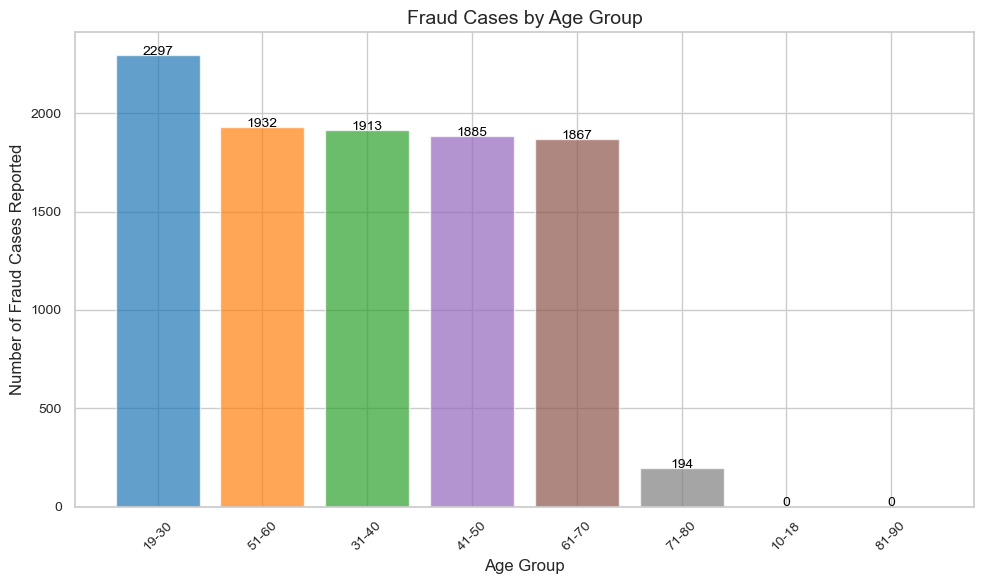

In [ ]:
# Defining bins and labels to classify the ages into groups
bins = [10, 18, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filtering the DataFrame for fraud cases and group by age bins
age_bins_fraud = df[df["Is_Fraud"] == True]['age_group'].value_counts().sort_values(ascending=False)


# Plotting the ages for each bin showing the fraud cases
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', len(age_bins_fraud)) 
bars = plt.bar(age_bins_fraud.index, age_bins_fraud.values, color=colors.colors, alpha=0.7)
plt.title('Fraud Cases by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fraud Cases Reported', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding labels
for bar, value in zip(bars, age_bins_fraud.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(value), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


* For customers at the age 19-30 and 51 - 60 show significantly higher numbers of fraud cases which further indicates that individuals in the age gropus are more vulnerable to fraud.

#### 2.2.1.7 Histogram Showing Age Distribution

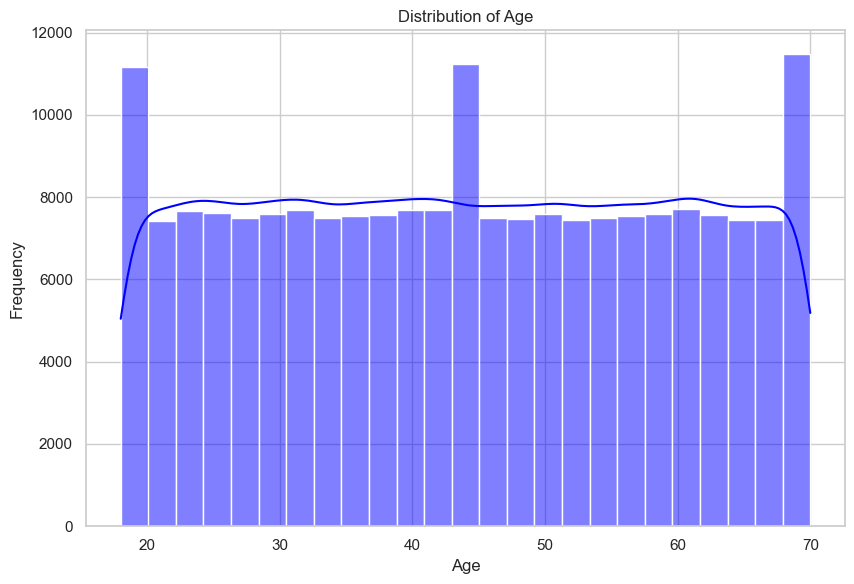

In [ ]:
# Histogram for Age Distribution
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 2)
sns.histplot(df['Age'], bins=25, kde=True, color="blue")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

* There are noticeable peaks in the distribution of the ages of 20, 45 and 70, which may imply a higher number of customers within these age groups.

#### 2.2.2 Bivariate Analysis

#### 2.2.2.1 Analysis of Fraud Cases over Time

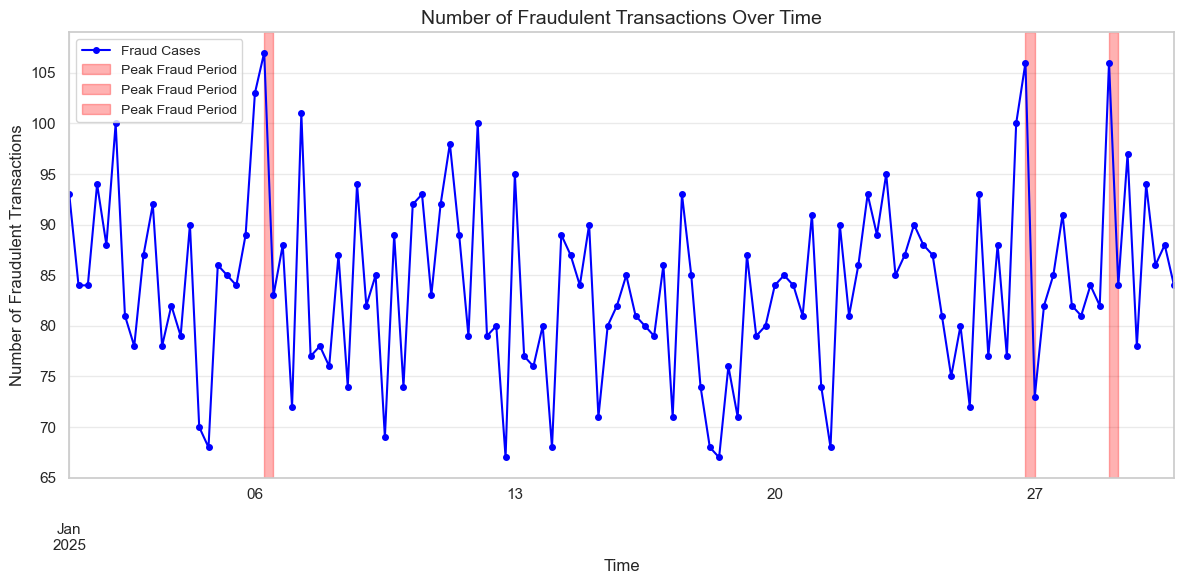


Top 3 Peak Fraud Periods:
Peak 1: Start = 2025-01-06 06:00:00, End = 2025-01-06 12:00:00, Count = 107
Peak 2: Start = 2025-01-29 00:00:00, End = 2025-01-29 06:00:00, Count = 106
Peak 3: Start = 2025-01-26 18:00:00, End = 2025-01-27 00:00:00, Count = 106


In [ ]:
# Combining Transaction_Date and Transaction_Time into a single datetime column 
df['transaction_datetime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'], dayfirst=True)

# Filtering the dataset to include only fraudulent transactions
fraud_df = df[df['Is_Fraud'] == 1]

# Resampling the data to count the number of frauds every 6 hours
fraud_df.set_index('transaction_datetime', inplace=True)
fraud_counts = fraud_df.resample('6H').size()

# Identifying the three peak fraud periods
top_three_periods = fraud_counts.sort_values(ascending=False).head(3)

# Extracting the start and end times for each peak period
peak_periods = [
    (period, period + pd.Timedelta(hours=6)) for period in top_three_periods.index
]


# Visualizing the fraud counts with highlighted peak periods
plt.figure(figsize=(12, 6))
fraud_counts.plot(kind='line', marker='o', color='blue', markersize=4, label='Fraud Cases')

# Highlighting each peak period
for start, end in peak_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label=f"Peak Fraud Period")

plt.title("Number of Fraudulent Transactions Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Printing the top three peak fraud periods
print("\nTop 3 Peak Fraud Periods:")
for i, (start, end) in enumerate(peak_periods, start=1):
    print(f"Peak {i}: Start = {start}, End = {end}, Count = {top_three_periods[start]}")


Given that the dataset was sourced from India, we researched on what was unique during the peak fraud periods. We established that on 6/01/2025 was Guru Gobind Singh's Birthday, a holiday celebrated in some states in India. Similarly, 26/01/2025 was Republic Day (G); a national holiday in India. India also observed lunar new year on 29/01/2025, one of the most important celebrations of the year among East and Southeast Asian cultures. There could be a relationship between the number of frauds and holiday periods.

### 2.2.2.2 Analysis of Transaction Amount Targeted by Fraud

In [ ]:
# Total transaction amount affected by fraud
fraud_trans = df[df["Is_Fraud"] == 1]['Transaction_Amount'].sum()
non_fraud_trans = df[df["Is_Fraud"] == 0]['Transaction_Amount'].sum()

# Creating a dictionary for visualization
data = {
    'Fraud Status': ['Fraud', 'Non-Fraud'],
    'Total Transaction Amount': [fraud_trans, non_fraud_trans]
}

# bar plot elements
fig = px.bar(data, 
             x='Fraud Status', 
             y='Total Transaction Amount',
             title='Total Transaction Amount Affected by Fraud',
             labels={'Fraud Status': 'Fraud Status', 'Total Transaction Amount': 'Total Transaction Amount'},
             color='Fraud Status',
             color_discrete_map={'Fraud': 'blue', 'Non-Fraud': 'orange'}, 
             text='Total Transaction Amount')  

# Adding labels and graph size
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(width=768, height=576)  

# Showing the plot
fig.show()

* From the dataset,  a total transactions amount of 497.1157 Million Indian Rupees were reported to have been targeted by Fraud.

#### 2.2.2.3 BoxPlot Showing Distribution of Fraud and Non Fraud Cases by the Numerical Features

First we will select numerical and categorical features in the dataframe

In [ ]:
# Numerical and categorical columns in the dataset
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Printing the numerical and categorical columns in the dataset
print(f"1. The numerical columns in the dataset are: {num_cols}\n")
print(f"2. The categorical columns in the dataset are: {cat_cols}")

1. The numerical columns in the dataset are: ['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud']

2. The categorical columns in the dataset are: ['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Transaction_Currency', 'Customer_Contact', 'Transaction_Description', 'Customer_Email']


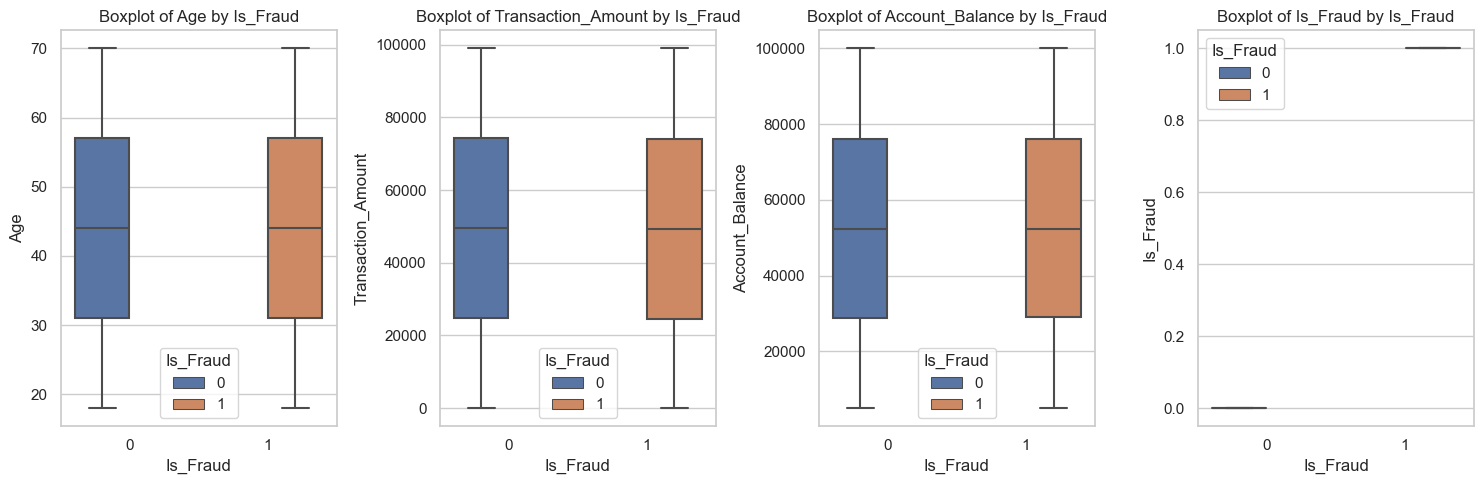

In [183]:
# Plotting the relationship between numerical features and the target variable 'Is_Fraud'
plt.figure(figsize=(15, 5))
for i, feature in enumerate(num_cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='Is_Fraud', y=feature, data=df, hue='Is_Fraud')
    plt.title('Boxplot of ' + feature + ' by Is_Fraud')
plt.tight_layout()
plt.show()


* The boxplots for numerical features by Is_Fraud indicate that there is no significant difference in the distributions of these features between fraudulent and non-fraudulent transactions. Both categories show similar ranges and medians, suggesting that the numerical features do not provide strong discriminatory power for identifying fraudulent transactions. This could imply that other factors, possibly categorical or behavioral, may be more relevant in predicting fraud.


### 2.2.2.4 Distribution of Fraud and Non Fraud Cases by Gender, Age, Account Type and Device Type


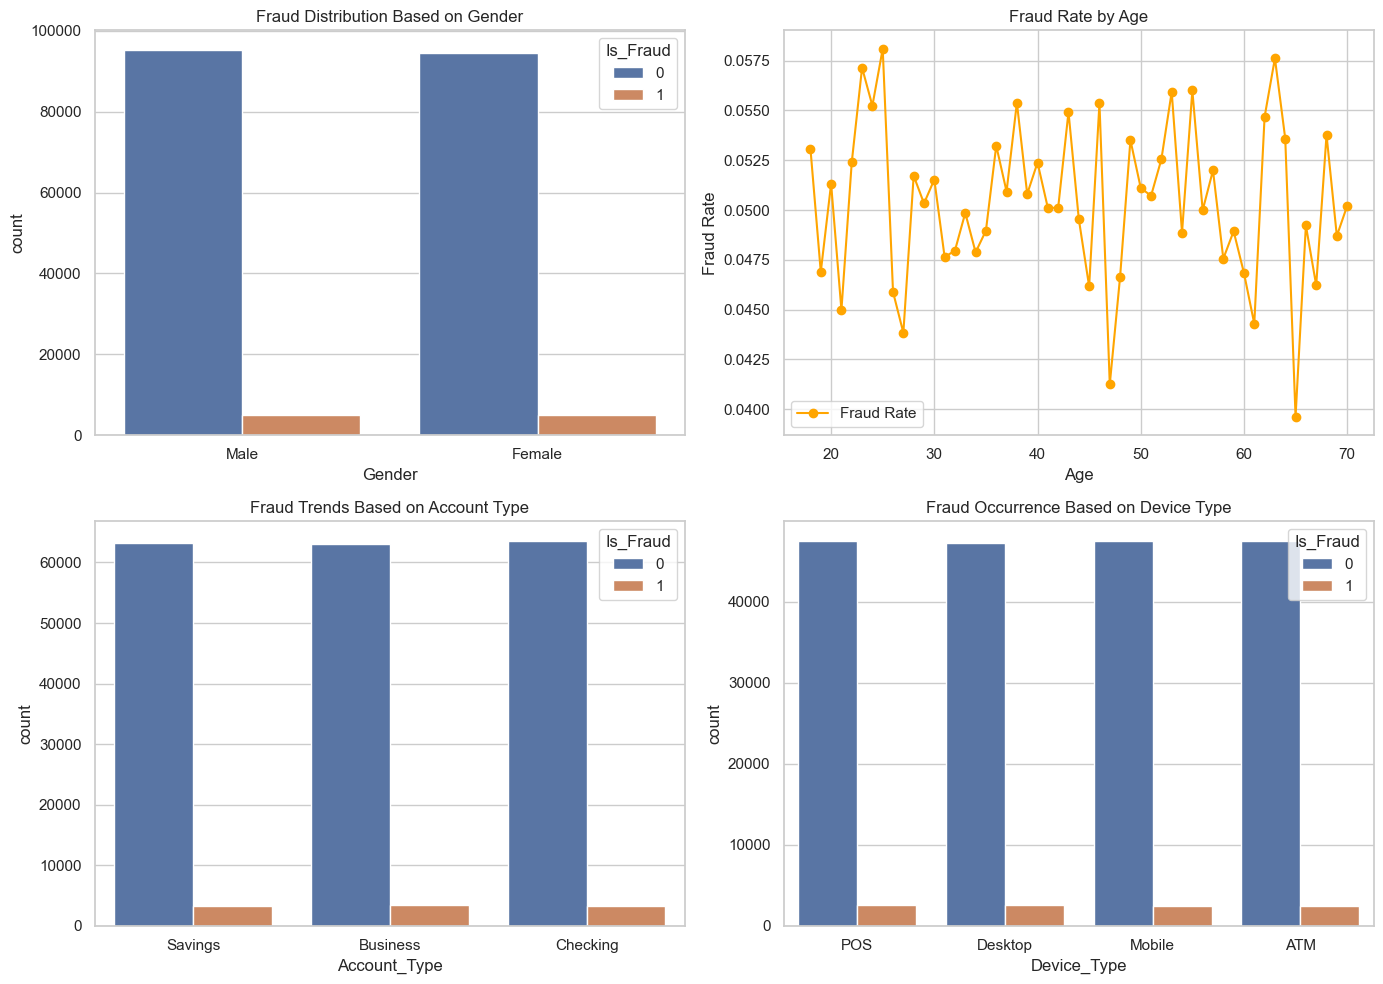

In [ ]:
# Creating subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
axes = axes.flatten() 

# Gender vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[0], x='Gender', hue='Is_Fraud', data=df)
axes[0].set_title('Fraud Distribution Based on Gender')

# Age vs. Is_Fraud (Line Graph)
age_fraud_counts = df.groupby('Age')['Is_Fraud'].sum() 
age_total_counts = df['Age'].value_counts().sort_index()  
fraud_rate = age_fraud_counts / age_total_counts  

axes[1].plot(fraud_rate.index, fraud_rate.values, marker='o', linestyle='-', color='orange', label='Fraud Rate')
axes[1].set_title('Fraud Rate by Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fraud Rate')
axes[1].legend()

# Account Type vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[2], x='Account_Type', hue='Is_Fraud', data=df)
axes[2].set_title('Fraud Trends Based on Account Type')

# Device Type vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[3], x='Device_Type', hue='Is_Fraud', data=df)
axes[3].set_title('Fraud Occurrence Based on Device Type')

# Adjusting layout
plt.tight_layout()
plt.show()

* The count plot shows that there are more non-fraudulent transactions for both genders, but the proportion of fraudulent transactions is slightly higher among males compared to females. This suggests that gender may play a role in the likelihood of fraud, warranting further investigation into behavioral patterns.
* The line graph illustrates the fraud rate by age, indicating that the fraud rate seems to be volatile with numerous peaks and floors. This indicates that age may not be a consistent predictor of fraud.
* The distribution of fraudulent transactions across different devices is relatively equal, indicating that there may not be a significant difference in fraud occurrence based on the device used. 


#### 2.2.3 Multivariate Analysis

#### 2.2.3.1 Visualization of Relationships Among Numerical Features Using Pairplot

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



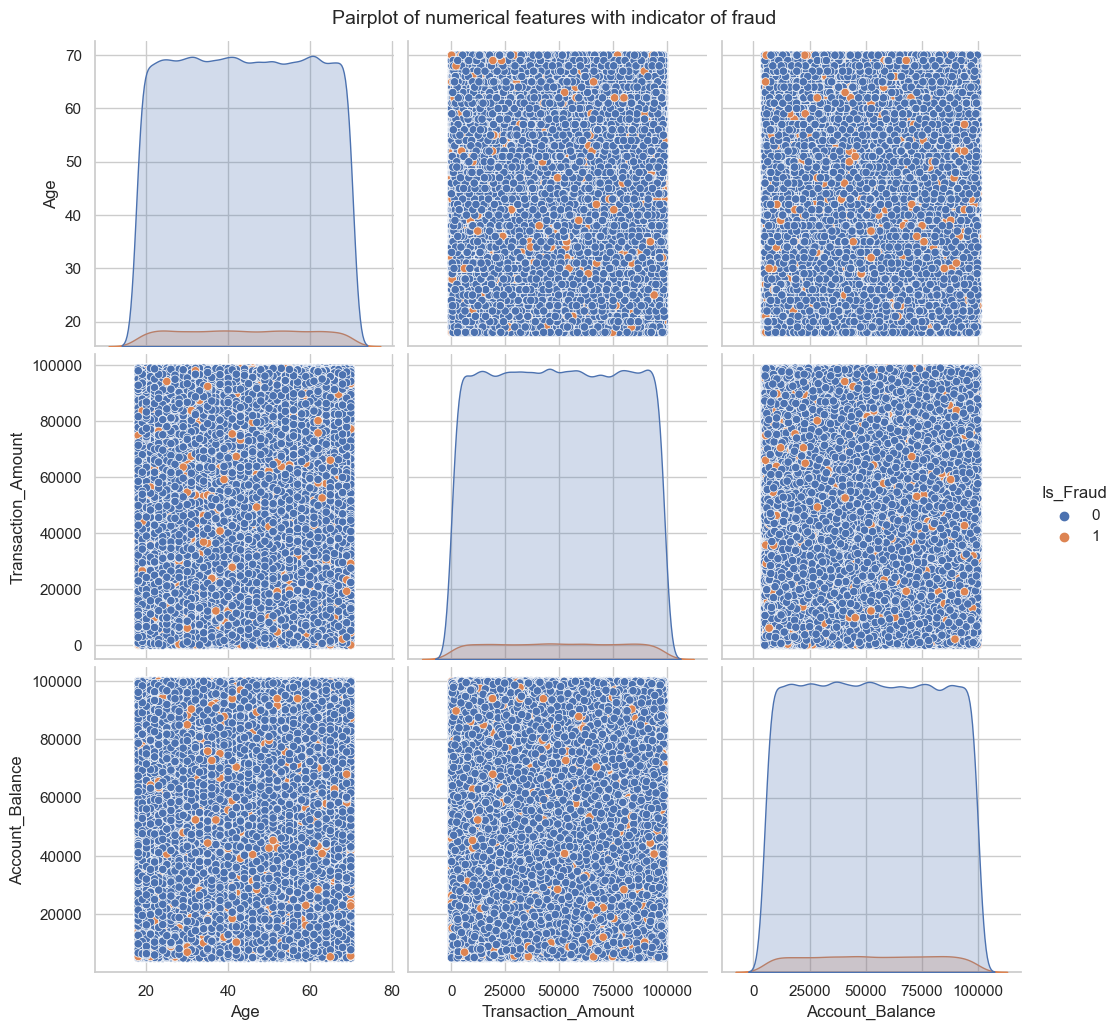

In [186]:
# Selecting numerical Features
numerical_df = df.select_dtypes(include=['number'])

# Visualizing a pairplot for all columns with numerical values in the DataFrame
pairplot=sns.pairplot(numerical_df, hue='Is_Fraud', kind='scatter', height=3.5)

# Plotting and displaying the results
pairplot.fig.suptitle("Pairplot of numerical features with indicator of fraud", fontsize=14)
plt.subplots_adjust(top=0.95)

plt.show()

- Fraudulent transactions seems to be scattered across ages, transaction amount and account balance.    


#### 2.2.3.2 Feature Correlation Analysis for Understanding Relationships

First we will convert the Transaction Date and Transaction Time to DateTime Format, then extract the Day, Hour, Minute and Second

In [187]:
# Converting to numericals
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y')
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S')

# Extracting new features from 'Transaction_Date' and 'Transaction_Time'
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Hour'] = df['Transaction_Time'].dt.hour
df['Transaction_Minute'] = df['Transaction_Time'].dt.minute
df['Transaction_Second'] = df['Transaction_Time'].dt.second

# Dropping 'Transaction_Date' and 'Transaction_Time' columns after feature extraction
df = df.drop(columns=['Transaction_Date', 'Transaction_Time'])
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Amount,...,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,age_group,transaction_datetime,Transaction_Day,Transaction_Hour,Transaction_Minute,Transaction_Second
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,32415.45,...,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com,61-70,2025-01-23 16:04:07,23,16,4,7
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,43622.60,...,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com,51-60,2025-01-11 17:14:53,11,17,14,53
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,63062.56,...,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com,19-30,2025-01-25 03:09:52,25,3,9,52
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,14000.72,...,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com,51-60,2025-01-19 12:27:02,19,12,27,2
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,18335.16,...,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com,41-50,2025-01-30 18:30:46,30,18,30,46


Then we will plot the Correlation heatmap for the numerical columns

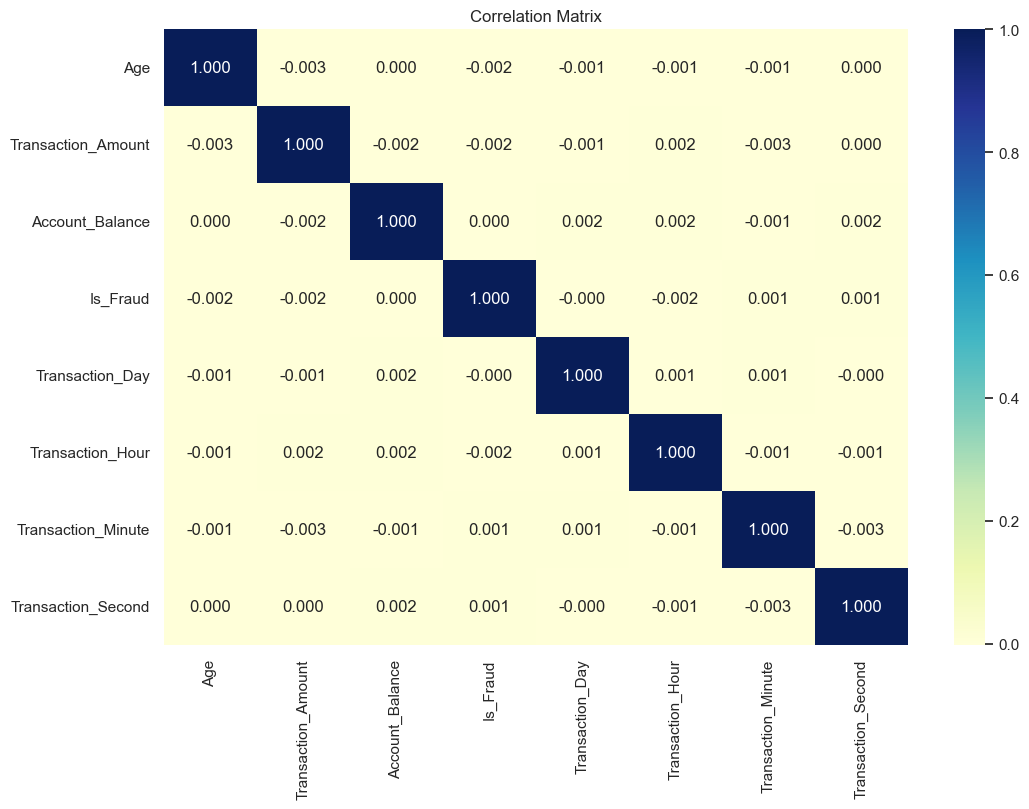

In [188]:
# Computing correlation for all numeric columns in DataFrames
corr_trained = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))

# Plotting the heatmap
sns.heatmap(corr_trained,annot=True,cmap="YlGnBu", fmt=".3f")
plt.title("Correlation Matrix");

The correlation matrix shows very weak linear relationships (correlation coefficients near zero) among variables, indicating minimal direct association. Most variables are linearly independent, suggesting that changes in one do not strongly affect others. This implies that non-linear patterns or additional feature engineering may be necessary for predictive modeling.

## 3.0 Data Preparation

In this step, we shall prepare our data for modelling. The following steps will be undertaken:
* Remove nnnecessary columns which we deem less important for our modelling
* Data Transformation, where did standard scaling and label encoding
* We shall also check for outliers as skewed data may have an effect on our modelling process
* We will also handle class imbalance since our class feature is highly imbalanced 


First, we will remove unnecessary columns from our dataframe because:

* State and City since it has been combined under Transaction_Location column. 
* Customer and transaction related columns that may not impact on our models
* Age_group as it was feature engineered for EDA purposes.
* Column 'transaction_datetime' is not needed as we have Transaction_Day and Transaction_Hour to represent the same information as transaction_datetime.


In [ ]:
# Removing columns not necessary to evaluate the model performance
Cols_to_drop=["Customer_ID", "Customer_Name", "Transaction_ID","Merchant_ID", "Customer_Contact", "Customer_Email", "State", "City", "Transaction_Currency", "Transaction_Description","age_group","transaction_datetime"]
df_clean = df.drop(columns=Cols_to_drop)

# Printing the shape of the resulting dataframe
print(f"The dataset has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns")


The dataset has 200000 rows and 16 columns


Next we shall check for outliers in the dataframe

In [190]:
# Detecting outliers using IQR
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

# Showing the count of Fraud and Non_fraud cases   
print(df_clean["Is_Fraud"].value_counts())

Outliers in Age: 0
Outliers in Transaction_Amount: 0
Outliers in Account_Balance: 0
Outliers in Is_Fraud: 10088
Is_Fraud
0    189912
1     10088
Name: count, dtype: int64


* From the analysis above, the target variable seems to have outliers. However, these are not actual outliers but rather representations of fraud (Is_Fraud = 1) and non-fraud (Is_Fraud = 0) which is a binary classification.

Next, we will apply label encoding to convert categorical columns into a numerical format. We will list the final numerical and categorical columns selected for our modelling purpose
 

In [191]:
# Identifying numerical and categorical features
final_num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.drop("Is_Fraud", errors='ignore').tolist()
final_cat_cols = df_clean.select_dtypes(include=["object"]).columns.tolist()

# Printing numerical and categorical columns
print(f"Numerical Columns: {', '.join(final_num_cols)}")
print(f"Categorical Columns: {', '.join(final_cat_cols)}")

Numerical Columns: Age, Transaction_Amount, Account_Balance
Categorical Columns: Gender, Bank_Branch, Account_Type, Transaction_Type, Merchant_Category, Transaction_Device, Transaction_Location, Device_Type


Next, we will convert categorical data into numeric form so that our models can process it through label encoding

In [ ]:
# Instantiating Label Encoder and fitting on the dataframe
encoder = LabelEncoder()
for col in final_cat_cols :
    df_clean[col] = encoder.fit_transform(df_clean[col]) 

In [194]:
# Confirming label encoding is successful
df_clean.head()

,Gender,Age,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Day,Transaction_Hour,Transaction_Minute,Transaction_Second
0,1,60,127,2,32415.45,3,5,74557.27,17,129,3,0,23,16,4,7
1,0,51,100,0,43622.60,0,5,74622.66,9,102,1,0,11,17,14,53
2,1,20,13,2,63062.56,0,3,66817.99,0,13,1,0,25,3,9,52
3,0,57,22,0,14000.72,2,2,58177.08,8,24,2,0,19,12,27,2
4,0,43,7,2,18335.16,3,2,16108.56,16,7,2,0,30,18,30,46


## 4.0 Modelling and Evaluation

In this section, we will build and optimize classification models for our task. This process will involve several key steps, including:

* Creating pipelines that incorporate pre-processing steps such as feature scaling

* Defining features and the target variable for model training

* Splitting the data into training and testing sets

* Training multiple models on the training dataset

* Identifying the best-performing model based on evaluation metrics

* Tuning the best model using hyperparameter optimization

* Evaluating models performance to assess effectiveness and generalization

By following these steps, we aim to develop a robust and accurate fraud detection system capable of distinguishing fraudulent transactions from legitimate ones.


We divided our dataset into training and test sets using the “Train_test_ split” method. This will assist in assessing the models’ ability to perform effectively on new, unseen data and determining their overall efficacy. 

In [ ]:
# Identifying features and target variable
X = df_clean.drop(columns='Is_Fraud')
y = df_clean['Is_Fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.1 Creating our Baseline Model

In [ ]:
# Standardizing our data for better model performance and stability
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We used the SMOTE technique to solve the issue of class imbalance since this dataset is highly imbalanced

In [ ]:
# Initializing and applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Instantiating our Logistic Regression Model
log_reg = LogisticRegression(class_weight="balanced", random_state=42)


# Fitting the model to the balanced training data
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=42)

The Logistic Regression Model which is our baseline model has been initialized and fitted to the data

In [ ]:
# Making predictions
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluating the baseline model
report_log = classification_report(y_test, y_pred_log)
print(report_log)


              precision    recall  f1-score   support

           0       0.95      0.51      0.66     37982
           1       0.05      0.49      0.09      2018

    accuracy                           0.51     40000
   macro avg       0.50      0.50      0.38     40000
weighted avg       0.90      0.51      0.63     40000



The model identified 49% of the actual instances of Is_Fraud class with a 51% accuracy of all the instances. The model is highly biased toward class zero, evident from the high precision score of 95%. 

In [ ]:
# Evaluating the model
accuracy_score_log = accuracy_score(y_test, y_pred_log)
print(f"The accuracy score of our baseline Logistic Regression Model is {accuracy_score_log}")

The accuracy score of our baseline Logistic Regression Model is 0.505675


### 4.2 Alternative Models Considered for Fraud Detection
The other models we have considered for this project are:
1. Decision Tree Classifier : This is a simple, interpretable model that splits data into branches based on feature thresholds, making decisions at each node until reaching a classification.

2. Random Forest Classifier: This is an ensemble of decision trees where each tree votes to make predictions, improving accuracy and reducing overfitting compared to a single tree.

3. K-Nearest Neighbors (KNN) Classifier: A non-parametric model that classifies data points based on the majority class of their closest neighbors in feature space.

4. Bagging Classifier: This is an ensemble model that combines multiple weak learners (like decision trees) trained on bootstrap samples to enhance stability and accuracy.

5. Adaboost Classifier: This is a boosting algorithm that combines weak classifiers iteratively, weighting misclassified instances more heavily in subsequent iterations.

6. Gradient Boosting Classifier: A powerful boosting model that sequentially trains weak learners to minimize error using gradient descent, often capturing complex patterns.

7. XGBoost Classifier: An optimized and fast gradient boosting algorithm widely used for high-performance tasks, offering features like regularization and handling sparse data efficiently.

8. Stacking Classifier:  is an ensemble learning method that combines predictions from multiple base models using a meta-model to improve overall performance.



In [ ]:
# Defining a function to create pipelines
def create_pipeline(model):
    return Pipeline([
        ('clf', model)              
    ])

# Computing class weights for imbalance handling
class_weights = compute_class_weight("balanced", classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Sampling weights for boosting models
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train_resampled)

# Defining models with parameters
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
    "Kneighbors Classifier": KNeighborsClassifier(n_neighbors=5, weights="distance"),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(class_weight="balanced"), random_state=42, n_estimators=200),
    "Adaboost Classifier": AdaBoostClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=200, random_state=2),
    "Xgboost Classifier": XGBClassifier(n_estimators=200, scale_pos_weight=class_weights[0] / class_weights[1], random_state=42)
}

# Creating pipelines
pipelines = {name: create_pipeline(model) for name, model in models.items()}

In [ ]:
# Fitting the pipelines to the training data
for name, pipe in pipelines.items():
    print(f"Fitting {name} model")
    if name == "Gradient Boosting Classifier":
        pipe.fit(X_train_resampled, y_train_resampled, clf__sample_weight=sample_weights)
    elif name == "Adaboost Classifier":
        pipe.fit(X_train_resampled, y_train_resampled, clf__sample_weight=sample_weights)
    else:
        pipe.fit(X_train_resampled, y_train_resampled)

Fitting Decision Tree Classifier model
Fitting Random Forest Classifier model
Fitting Kneighbors Classifier model
Fitting Bagging Classifier model
Fitting Adaboost Classifier model
Fitting Gradient Boosting Classifier model
Fitting Xgboost Classifier model


### 4.2.1 Evaluating the Models
After creating a pipelines with the models and fitting them to the training data, we shall now evaluate the performance of the models on the test data. We shall use accuracy as the performance metric here

In [313]:
# Comparing accuracies
for name, model in pipelines.items():
    test_acc = model.score(X_test_scaled, y_test)
    print(f"{name} pipeline test accuracy: {test_acc:.4f}")

# Identifying the most accurate model on test data
best_acc = 0.0
best_model = None
best_name = ""

for name, model in pipelines.items():
    test_acc = model.score(X_test_scaled, y_test)
    if test_acc > best_acc:
        best_acc = test_acc
        best_model = model
        best_name = name

print(f"Classifier with best accuracy: {best_name} ({best_acc:.4f})")

Decision Tree Classifier pipeline test accuracy: 0.8801
Random Forest Classifier pipeline test accuracy: 0.9496
Kneighbors Classifier pipeline test accuracy: 0.7059
Bagging Classifier pipeline test accuracy: 0.9492
Adaboost Classifier pipeline test accuracy: 0.9496
Gradient Boosting Classifier pipeline test accuracy: 0.9496
Xgboost Classifier pipeline test accuracy: 0.9494
Classifier with best accuracy: Random Forest Classifier (0.9496)


#### Evaluating the models using Precision-Recall Curves

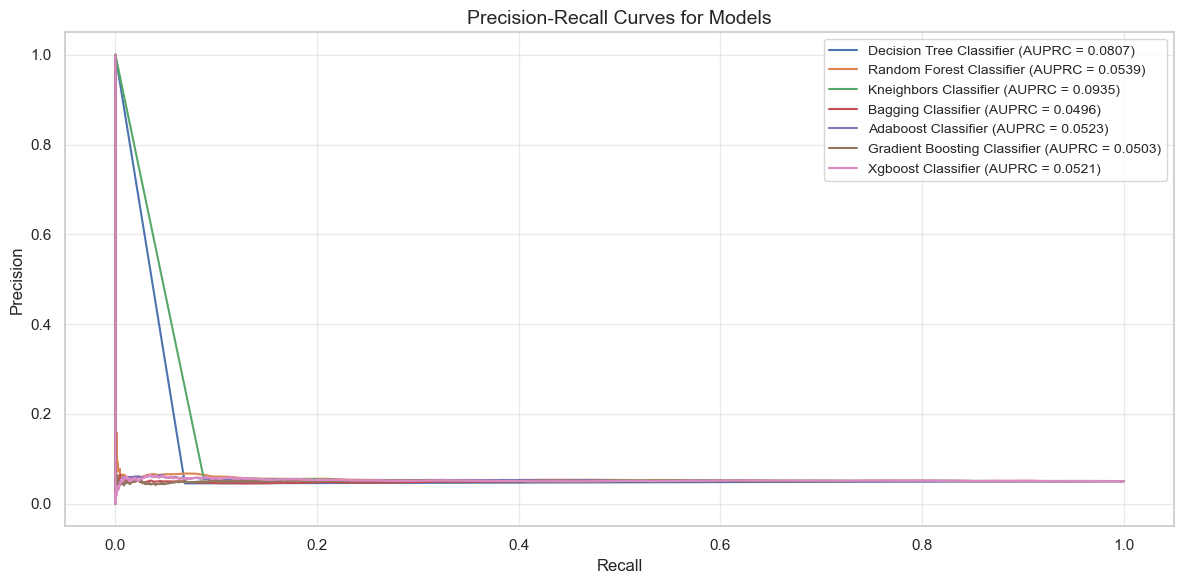

In [ ]:
# Initializing lists to store metrics for the models
results = []

# Plotting the Precision-Recall Curve (PRC) for each model
plt.figure(figsize=(12, 6))
for name, model in pipelines.items():

    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision) 
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    prec = precision_score(y_test, model.predict(X_test_scaled), zero_division=0)
    rec = recall_score(y_test, model.predict(X_test_scaled))
    results.append({"Model": name, "Accuracy": test_acc, "Precision": prec, "Recall": rec, "AUPRC": pr_auc})
    
    # Plotting Precision-Recall Curve
    plt.plot(recall, precision, label=f"{name} (AUPRC = {pr_auc:.4f})")

plt.title("Precision-Recall Curves for Models", fontsize=14)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()



* The K-Nearest Neighbors (KNN) classifier achieves the highest AUPRC (0.0935), making it the most effective at detecting fraud while maintaining a better trade-off between precision and recall.

* The Decision Tree Classifier also performs moderately well with an AUPRC of 0.0807, indicating some ability to balance precision and recall.

* Models like Bagging Classifier (0.0496), Random Forest (0.0539), and Gradient Boosting (0.0503) have lower AUPRC values, showing that their performance is less effective in handling the imbalanced nature of fraud detection.

* Other classifiers like Adaboost (0.0523) and XGBoost (0.0521) also exhibit limited ability to balance precision and recall.


We shall then create a DataFrame displaying the performance metrics of all the models

In [ ]:
# Creating and displaying a summary DataFrame of metrics
df_results_1 = pd.DataFrame(results).sort_values(by="AUPRC", ascending=False)

print("\nModel Performance Summary:")
df_results_1


Model Performance Summary:


,Model,Accuracy,Precision,Recall,AUPRC
2,Kneighbors Classifier,0.705900,0.050793,0.273043,0.093486
0,Decision Tree Classifier,0.880125,0.045499,0.068880,0.080677
1,Random Forest Classifier,0.949550,0.000000,0.000000,0.053888
4,Adaboost Classifier,0.949550,0.000000,0.000000,0.052331
6,Xgboost Classifier,0.949400,0.000000,0.000000,0.052140
5,Gradient Boosting Classifier,0.949550,0.000000,0.000000,0.050345
3,Bagging Classifier,0.949175,0.000000,0.000000,0.049623


* K-Nearest Neighbors (KNN) achieved the highest recall (0.273) and the best AUPRC (0.0935). This indicates that it detects a larger proportion of fraud cases and balances precision and recall effectively, making it the most suitable model for fraud detection based on these metrics.

* Other models like Decision Tree, Random Forest, Adaboost, and Gradient Boosting performed well in terms of accuracy (above 0.88), but their recall and AUPRC were lower, with kNN outperforming them in fraud-specific metrics.

* Random Forest, Adaboost, XGBoost, Gradient Boosting, and Bagging Classifiers had AUPRC values below 0.054, and 0 precision and recall, indicating poor performance in correctly identifying fraud cases.

* The K-Nearest Neighbors (KNN) model stands out as the overall best for fraud detection, excelling in recall (fraud case identification) and AUPRC (effectiveness in imbalanced datasets

We shall now build a Stacking Classifier Model and see how the performance compares to the performance of individual models

### 4.3 Stacking Classifier Model
* A stacking classifier is an ensemble learning method that combines predictions from multiple base models using a meta-model to improve overall performance.

In [ ]:
# Computing class weights
class_weights = compute_class_weight("balanced", classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Sampling weights for boosting models
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train_resampled)

# Defining base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(class_weight="balanced", random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)),
    ('kneighbors', KNeighborsClassifier(n_neighbors=5, weights="distance")),
    ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier(class_weight="balanced"), random_state=42, n_estimators=100))
]

# Defining meta-model (XGBoost)
meta_model = XGBClassifier(n_estimators=100, scale_pos_weight=class_weights[0] / class_weights[1], random_state=42)

# Creating Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)


In [ ]:
# Training Stacking Model
stacking_model.fit(X_train_resampled, y_train_resampled)

StackingClassifier(estimators=[('decision_tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('kneighbors',
                                KNeighborsClassifier(weights='distance')),
                               ('bagging',
                                BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'),
                                                  n_estimators...
                                                 gamma=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None, ...),
                   passthrough=True)

In [ ]:
# Predicting the test set data
y_pred = stacking_model.predict(X_test_scaled)

In [ ]:
# Printing Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     37982
           1       0.07      0.01      0.02      2018

    accuracy                           0.94     40000
   macro avg       0.51      0.50      0.49     40000
weighted avg       0.91      0.94      0.92     40000





* The Stacking Classifier performs well in overall accuracy and leverages the strengths of its base and meta models. However, its recall for fraud cases remains low, meaning it fails to identify most fraud cases.

* The K-Nearest Neighbors (KNN) model still stands out as the best performer for fraud detection due to its high recall and superior AUPRC when compared to other models, both critical for identifying fraud in imbalanced datasets.

### 4.4 Hyperparameter Tuning of Random Forest Model
Now we shall tune the Random Forest model to improve it's performance

First, we shall create a parameter grid for the hyperparameters we want to tune

In [ ]:
# Creating a param grid with parameters for tuning
param_grid = {
    "n_estimators": [50, 100, 200],        
    "max_depth": [5, 10, 15],               
    "min_samples_split": [2, 5, 10],       
    "min_samples_leaf": [1, 2, 4],          
    "max_features": ["sqrt", "log2"],       
    }

Next, we will set up a grid search using the Random Forest model as our estimator, along with the predefined hyperparameter grid. This process will explore all possible combinations of the specified hyperparameters to identify the optimal configuration for our model.

In [ ]:
# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="accuracy",         
    cv=3,                      
    verbose=2,
    n_jobs=-1                
)

In [ ]:
# Fitting to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
# Displaying the best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.914049359872874


In [332]:
# Accuracy score for best model
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test_scaled)
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
accuracy_score_rf

0.910825

In [ ]:
# Generating the classification report
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     37982
           1       0.05      0.04      0.04      2018

    accuracy                           0.91     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.91      0.91     40000



* While the tuned Random Forest is excellent for non-fraud classification, k-Nearest Neighbors (kNN) and Stacking Classifier outperform it for fraud detection tasks. 

### 4.5 Hyperparameter Tuning of KNeighbours Classifier

In [ ]:
# Creating a parameter grid for tuning
param_grid_knn = {
    "n_neighbors": [3, 5],  
    "metric": ["euclidean", "manhattan"]
}

# Initializing KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
# Performing Grid Search with Cross Validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring="roc_auc", n_jobs=-1, verbose=1)


In [ ]:
# Fitting the model on the training data
grid_search_knn.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Identifying the best knn model
best_knn = grid_search_knn.best_estimator_
print("Best KNN Model:", best_knn)

Best KNN Model: KNeighborsClassifier(metric='manhattan')


In [ ]:
# Predicting test labels using best knn model
y_pred_knn = best_knn.predict(X_test_scaled)


In [ ]:
# Printing the classification report
report = classification_report(y_test, y_pred_knn) 
print(report)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     37982
           1       0.05      0.23      0.09      2018

    accuracy                           0.76     40000
   macro avg       0.50      0.51      0.48     40000
weighted avg       0.91      0.76      0.82     40000



Next, we shall do overall comparison of all the models and recommend the best model from the metrics for our Fraud detection classification task.

In [ ]:
# Updating the pipelines dictionary to include the stacking model, tuned random forest, and tuned kNN
pipelines["Stacking Classifier"] = stacking_model
pipelines["Tuned Random Forest"] = best_model_rf
pipelines["Tuned KNeighbors"] = best_knn

# Functioning to evaluate models and generate a DataFrame
def create_model_metrics_dataframe(pipelines, X_test_scaled, y_test):
    results = [] 

    for name, model in pipelines.items():

        # Predicting probabilities for precision-recall curve
        y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
        
        # Calculate metrics
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        auprc = auc(recall, precision)  
        accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
        prec = precision_score(y_test, model.predict(X_test_scaled), zero_division=0)
        rec = recall_score(y_test, model.predict(X_test_scaled))
        
        # Appending results
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": prec,
            "Recall": rec,
            "AUPRC": auprc
        })

    # Create and return the DataFrame
    return pd.DataFrame(results)

# Generating DataFrame for all models
metrics_df = create_model_metrics_dataframe(pipelines, X_test_scaled, y_test)


In [379]:
metrics_df

,Model,Accuracy,Precision,Recall,AUPRC
0,Decision Tree Classifier,0.880125,0.045499,0.068880,0.080677
1,Random Forest Classifier,0.949550,0.000000,0.000000,0.053888
2,Kneighbors Classifier,0.705900,0.050793,0.273043,0.093486
3,Bagging Classifier,0.949175,0.000000,0.000000,0.049623
4,Adaboost Classifier,0.949550,0.000000,0.000000,0.052331
5,Gradient Boosting Classifier,0.949550,0.000000,0.000000,0.050345
6,Xgboost Classifier,0.949400,0.000000,0.000000,0.052140
7,Stacking Classifier,0.942700,0.069182,0.010902,0.052049
8,Tuned Random Forest,0.910825,0.046280,0.039148,0.050789
9,Tuned KNeighbors,0.761975,0.054189,0.225966,0.084625


Recommendation
Best Model for Fraud Detection:

The untuned K-Nearest Neighbors (KNN) model is the best performer for our fraud detection task based on:

* High recall (0.273), meaning it detects a larger proportion of fraud cases as compared to other models analysed

* Highest AUPRC (0.093), showing a strong performance in balancing precision and recall as compared to other models analysed

## Conclusion

#### i. Findings

* There seem to be a minor difference in the number of fraud cases between genders suggesting that the fraud occurences is relatively balanced across the genders.

* For customers at the age 19-30 and 51 - 60 years show significantly higher numbers of fraud cases which further indicates that individuals in the age groups are more vulnerable to fraud.

* The transaction type with the highest number of frauds is Transfer with 2,073 cases reported, followed closely by credit transactions with 2048 cases.

* The ATM Booth Kiosk, the ATM and the Self-service Machine channels posed the highest risk of fraud among the transaction devices.

* The peak periods of fraud incidents are during holidays.

### ii. Recommendation

* Financial institutions to use fraud by age-group analysis to perform risk assessment to inform and come up with awareness campaigns towards the targeted group to reduce chances of fraud.

* Financial institution to do a deeper analysis on the how to establish controls to mitigate risks of fraud in areas with highest frequency including transfers and credit transactions.

* More controls need to be established on the ATM Booth Kiosk, the ATM and the Self-service Machine as they reported the most frauds.

* Financial institution should heighten monitoring of fraudulent activities during holidays and special days marked in the country.

* Understanding the distribution of fraud cases by age group can aid in risk assessment and the development of targeted fraud prevention strategies. Financial institutions and security agencies can use this information to implement age-specific awareness campaigns and security measures.

* Understanding the distribution of fraud cases by gender can help in designing targeted fraud prevention strategies. For example, if females have a higher number of fraud cases, awareness campaigns and security measures can be tailored specifically for female users.

* The model that we recommend for fraud detection is K-Nearest Neighbors (KNN)  Classifier because it has the best recall and AUCPRC compared to the other models used.  


### iii. Insights for next steps

* Further studies are needed with emphasis on obtaining dataset from financial institution domiciled in Kenya.

## Reference

1. Central Bank of Kenya. (n.d.). Fraud safety. Retrieved March 13, 2025, from https://www.centralbank.go.ke/fraud-safety/

2. Kenyan Wall Street. (2024, March 10). INTERPOL arrests Kenyans involved in Ksh 1.1bn credit card fraud. Retrieved from https://kenyanwallstreet.com/interpol-arrests-kenyans-involved-in-ksh-1-1bn-credit-card-fraud/

3. Kiplagat, S. (2022, June 28). Foreign woman, Kenyans linked to Sh2.3bn overseas card fraud. Business Daily. Retrieved from https://www.businessdailyafrica.com/bd/economy/foreign-woman-kenyans-linked-to-sh23bn-overseas-card-fraud-3861828


4. Leevy, J. L., Khoshgoftaar, T. M., & Hancock, J. (2022, October). Evaluating performance metrics for credit card fraud classification. In 2022 IEEE 34th International Conference on Tools with Artificial Intelligence (ICTAI) (pp. 1336-1341). IEEE.

5. Sathyanarayanan, S., & Tantri, B. R. (2024). Confusion matrix-based performance evaluation metrics. African Journal of Biomedical Research, 4023-4031.

6. PYMNTS. (2024, December 10). Scam-Related Fraud Jumped 56% in 2024, Surpassing Digital Payment Crimes. Retrieved from https://www.pymnts.com/news/security-and-risk/2024/scam-related-fraud-jumped-56percent-surpassing-digital-payment-crimes

7. Retail Banker International. (2024). ID fraud may account for 50% of bank reported fraud by 2025. Retrieved from https://www.retailbankerinternational.com/news/id-fraud-may-account-for-50-per-cent-of-bank-reported-fraud-by-2025/






